# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pip install wordcloud
from wordcloud import WordCloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Load Dataset and Inspect

In [2]:
df = pd.read_csv('./refined_dataset.csv')

In [3]:
df

,Unnamed: 0,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,task_type
0,0,TASK_36085,Code review required urgently for merge.,High,2025-07-21,user_36,To Do,2025-05-23,15.58,17.97,Meeting
1,1,TASK_47492,Task needs completion before end of the day.,High,2025-07-25,user_70,Done,2025-06-02,13.13,13.26,Other
2,2,TASK_60680,High priority task: Resolve server outage now.,Critical,2025-06-21,NaN,In Progress,2025-05-29,8.83,8.40,Support
3,3,TASK_15554,Database optimization needed before backup.,High,2025-06-24,user_46,In Progress,2025-05-23,8.35,10.48,Other
4,4,TASK_10877,Code review required urgently for merge.,High,2025-08-10,user_20,In Progress,2025-06-03,4.27,4.58,Meeting
...,...,...,...,...,...,...,...,...,...,...,...
9495,9495,TASK_69673,Database optimization needed before backup.,High,2025-07-10,user_87,Done,2025-06-18,3.04,6.42,Other
9496,9496,TASK_66458,Task needs completion before end of the day.,High,2025-08-10,user_58,Done,2025-06-05,10.91,12.70,Other
9497,9497,TASK_98062,Refactor legacy module as per guidelines.,Medium,2025-07-05,user_85,Done,2025-05-25,6.71,9.48,Development
9498,9498,TASK_62635,Organize code comments and improve readability.,Low,2025-08-08,user_48,To Do,2025-06-01,3.43,2.75,Other


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9500 non-null   int64  
 1   task_id           9500 non-null   object 
 2   task_description  9500 non-null   object 
 3   priority          9026 non-null   object 
 4   deadline          9500 non-null   object 
 5   assigned_to       9018 non-null   object 
 6   status            9500 non-null   object 
 7   created_at        9500 non-null   object 
 8   estimated_hours   9500 non-null   float64
 9   actual_hours      9500 non-null   float64
 10  task_type         9500 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 816.5+ KB


In [5]:
df.describe(include='all', datetime_is_numeric=True)

,Unnamed: 0,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,task_type
count,9500.000000,9500,9500,9026,9500,9018,9500,9500,9500.000000,9500.000000,9500
unique,NaN,9500,20,4,60,100,4,30,NaN,NaN,6
top,NaN,TASK_36085,Schedule meeting with stakeholders next week.,Critical,2025-07-05,user_31,To Do,2025-05-25,NaN,NaN,Other
freq,NaN,1,520,2269,193,116,2375,356,NaN,NaN,3376
mean,4749.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.964288,9.963075,NaN
std,2742.558112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055360,4.380662,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.040000,NaN
25%,2374.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.430000,6.500000,NaN
50%,4749.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.895000,9.990000,NaN
75%,7124.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.470000,13.450000,NaN


# Retrieving the first and last 10 rows

In [6]:
df.head(10)

,Unnamed: 0,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,task_type
0,0,TASK_36085,Code review required urgently for merge.,High,2025-07-21,user_36,To Do,2025-05-23,15.58,17.97,Meeting
1,1,TASK_47492,Task needs completion before end of the day.,High,2025-07-25,user_70,Done,2025-06-02,13.13,13.26,Other
2,2,TASK_60680,High priority task: Resolve server outage now.,Critical,2025-06-21,NaN,In Progress,2025-05-29,8.83,8.40,Support
3,3,TASK_15554,Database optimization needed before backup.,High,2025-06-24,user_46,In Progress,2025-05-23,8.35,10.48,Other
4,4,TASK_10877,Code review required urgently for merge.,High,2025-08-10,user_20,In Progress,2025-06-03,4.27,4.58,Meeting
5,5,TASK_85745,Client report must be submitted by evening.,High,2025-08-12,user_79,To Do,2025-06-01,3.42,2.18,Other
6,6,TASK_54122,Conduct mid-cycle review of project progress.,Medium,2025-07-15,user_83,Blocked,2025-06-16,3.03,6.31,Meeting
7,7,TASK_99383,URGENT: System failure requires immediate atte...,Critical,2025-07-08,user_5,In Progress,2025-06-16,12.38,16.33,Debugging
8,8,TASK_24199,Update user avatars with new icons.,Low,2025-06-20,user_94,Blocked,2025-06-06,2.88,1.50,Other
9,9,TASK_34266,Enhance logging for future debugging.,Low,2025-06-19,user_90,Blocked,2025-06-08,12.19,13.83,Debugging


In [7]:
df.tail(10)

,Unnamed: 0,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,task_type
9490,9490,TASK_11764,Complete documentation for current sprint.,NaN,2025-08-05,user_13,Blocked,2025-06-05,14.51,17.46,Documentation
9491,9491,TASK_62851,URGENT: System failure requires immediate atte...,Critical,2025-07-03,user_7,Done,2025-05-25,7.90,10.89,Debugging
9492,9492,TASK_87134,Client report must be submitted by evening.,High,2025-06-30,user_99,In Progress,2025-05-22,8.01,10.85,Other
9493,9493,TASK_72043,Clean up old branches from repository.,Low,2025-06-22,user_3,To Do,2025-05-31,8.95,12.46,Other
9494,9494,TASK_71681,Update user avatars with new icons.,Low,2025-07-11,user_86,Done,2025-05-26,15.05,16.72,Other
9495,9495,TASK_69673,Database optimization needed before backup.,High,2025-07-10,user_87,Done,2025-06-18,3.04,6.42,Other
9496,9496,TASK_66458,Task needs completion before end of the day.,High,2025-08-10,user_58,Done,2025-06-05,10.91,12.70,Other
9497,9497,TASK_98062,Refactor legacy module as per guidelines.,Medium,2025-07-05,user_85,Done,2025-05-25,6.71,9.48,Development
9498,9498,TASK_62635,Organize code comments and improve readability.,Low,2025-08-08,user_48,To Do,2025-06-01,3.43,2.75,Other
9499,9499,TASK_19919,Clean up old branches from repository.,NaN,2025-08-11,user_63,Blocked,2025-06-17,8.32,8.72,Other


### we got to know that some missing and invalid entries lies in the dataset.

### Cleaning the dataset

## 1. Handle Missing Values

In [8]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Unnamed: 0            0
task_id               0
task_description      0
priority            474
deadline              0
assigned_to         482
status                0
created_at            0
estimated_hours       0
actual_hours          0
task_type             0
dtype: int64


In [9]:
df.drop_duplicates(inplace=True)
df['priority'].fillna(df['priority'].mode()[0], inplace=True)
df['assigned_to'].fillna("unassigned", inplace=True)

In [10]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Unnamed: 0          0
task_id             0
task_description    0
priority            0
deadline            0
assigned_to         0
status              0
created_at          0
estimated_hours     0
actual_hours        0
task_type           0
dtype: int64


## 2. Fixing Date Columns

In [11]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['deadline'] = pd.to_datetime(df['deadline'])

In [12]:
df.head()

,Unnamed: 0,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,task_type
0,0,TASK_36085,Code review required urgently for merge.,High,2025-07-21,user_36,To Do,2025-05-23,15.58,17.97,Meeting
1,1,TASK_47492,Task needs completion before end of the day.,High,2025-07-25,user_70,Done,2025-06-02,13.13,13.26,Other
2,2,TASK_60680,High priority task: Resolve server outage now.,Critical,2025-06-21,unassigned,In Progress,2025-05-29,8.83,8.40,Support
3,3,TASK_15554,Database optimization needed before backup.,High,2025-06-24,user_46,In Progress,2025-05-23,8.35,10.48,Other
4,4,TASK_10877,Code review required urgently for merge.,High,2025-08-10,user_20,In Progress,2025-06-03,4.27,4.58,Meeting


## 3. Feature Engineering

In [13]:
df['days_to_deadline'] = (df['deadline'] - df['created_at']).dt.days
df['created_month'] = df['created_at'].dt.month
df['created_weekday'] = df['created_at'].dt.day_name()
df['is_overdue'] = (df['actual_hours'] > df['estimated_hours']).astype(int)
df['task_description_length'] = df['task_description'].astype(str).apply(len)

In [14]:
df

,Unnamed: 0,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,task_type,days_to_deadline,created_month,created_weekday,is_overdue,task_description_length
0,0,TASK_36085,Code review required urgently for merge.,High,2025-07-21,user_36,To Do,2025-05-23,15.58,17.97,Meeting,59,5,Friday,1,40
1,1,TASK_47492,Task needs completion before end of the day.,High,2025-07-25,user_70,Done,2025-06-02,13.13,13.26,Other,53,6,Monday,1,44
2,2,TASK_60680,High priority task: Resolve server outage now.,Critical,2025-06-21,unassigned,In Progress,2025-05-29,8.83,8.40,Support,23,5,Thursday,0,46
3,3,TASK_15554,Database optimization needed before backup.,High,2025-06-24,user_46,In Progress,2025-05-23,8.35,10.48,Other,32,5,Friday,1,43
4,4,TASK_10877,Code review required urgently for merge.,High,2025-08-10,user_20,In Progress,2025-06-03,4.27,4.58,Meeting,68,6,Tuesday,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9495,9495,TASK_69673,Database optimization needed before backup.,High,2025-07-10,user_87,Done,2025-06-18,3.04,6.42,Other,22,6,Wednesday,1,43
9496,9496,TASK_66458,Task needs completion before end of the day.,High,2025-08-10,user_58,Done,2025-06-05,10.91,12.70,Other,66,6,Thursday,1,44
9497,9497,TASK_98062,Refactor legacy module as per guidelines.,Medium,2025-07-05,user_85,Done,2025-05-25,6.71,9.48,Development,41,5,Sunday,1,41
9498,9498,TASK_62635,Organize code comments and improve readability.,Low,2025-08-08,user_48,To Do,2025-06-01,3.43,2.75,Other,68,6,Sunday,0,47


### Ordinal Encode Priority

In [15]:
priority_map = {'Low': 0, 'Medium': 1, 'High': 2, 'Critical' : 3}
df['priority_encoded'] = df['priority'].map(priority_map)
df.head(5)

,Unnamed: 0,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,task_type,days_to_deadline,created_month,created_weekday,is_overdue,task_description_length,priority_encoded
0,0,TASK_36085,Code review required urgently for merge.,High,2025-07-21,user_36,To Do,2025-05-23,15.58,17.97,Meeting,59,5,Friday,1,40,2
1,1,TASK_47492,Task needs completion before end of the day.,High,2025-07-25,user_70,Done,2025-06-02,13.13,13.26,Other,53,6,Monday,1,44,2
2,2,TASK_60680,High priority task: Resolve server outage now.,Critical,2025-06-21,unassigned,In Progress,2025-05-29,8.83,8.40,Support,23,5,Thursday,0,46,3
3,3,TASK_15554,Database optimization needed before backup.,High,2025-06-24,user_46,In Progress,2025-05-23,8.35,10.48,Other,32,5,Friday,1,43,2
4,4,TASK_10877,Code review required urgently for merge.,High,2025-08-10,user_20,In Progress,2025-06-03,4.27,4.58,Meeting,68,6,Tuesday,1,40,2


### Encode Status

In [16]:
from sklearn.preprocessing import LabelEncoder

status_le = LabelEncoder()
df['status_encoded'] = status_le.fit_transform(df['status'])
df[['status','status_encoded']].head(12)

,status,status_encoded
0,To Do,3
1,Done,1
2,In Progress,2
3,In Progress,2
4,In Progress,2
5,To Do,3
6,Blocked,0
7,In Progress,2
8,Blocked,0
9,Blocked,0


### One-hot for Assigned_to (if exists)

In [17]:
if 'assigned_to' in df.columns:
    df = df.join(pd.get_dummies(df['assigned_to'], prefix='assigned'))
df.head(5)

,Unnamed: 0,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,...,assigned_user_90,assigned_user_91,assigned_user_92,assigned_user_93,assigned_user_94,assigned_user_95,assigned_user_96,assigned_user_97,assigned_user_98,assigned_user_99
0,0,TASK_36085,Code review required urgently for merge.,High,2025-07-21,user_36,To Do,2025-05-23,15.58,17.97,...,0,0,0,0,0,0,0,0,0,0
1,1,TASK_47492,Task needs completion before end of the day.,High,2025-07-25,user_70,Done,2025-06-02,13.13,13.26,...,0,0,0,0,0,0,0,0,0,0
2,2,TASK_60680,High priority task: Resolve server outage now.,Critical,2025-06-21,unassigned,In Progress,2025-05-29,8.83,8.40,...,0,0,0,0,0,0,0,0,0,0
3,3,TASK_15554,Database optimization needed before backup.,High,2025-06-24,user_46,In Progress,2025-05-23,8.35,10.48,...,0,0,0,0,0,0,0,0,0,0
4,4,TASK_10877,Code review required urgently for merge.,High,2025-08-10,user_20,In Progress,2025-06-03,4.27,4.58,...,0,0,0,0,0,0,0,0,0,0


# EDA Visualizations

### 1. Priority Distribution

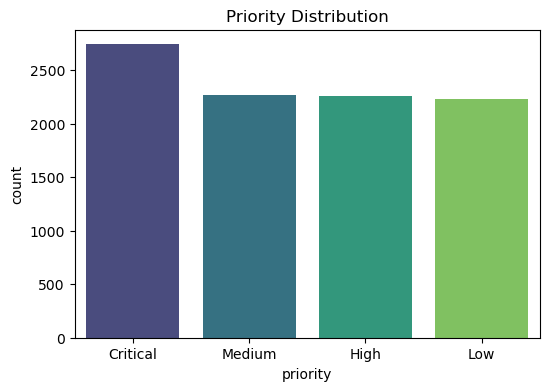

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'priority', order = df['priority'].value_counts().index, palette = 'viridis')
plt.title("Priority Distribution")
plt.show()

### 2. Task Status Distribution

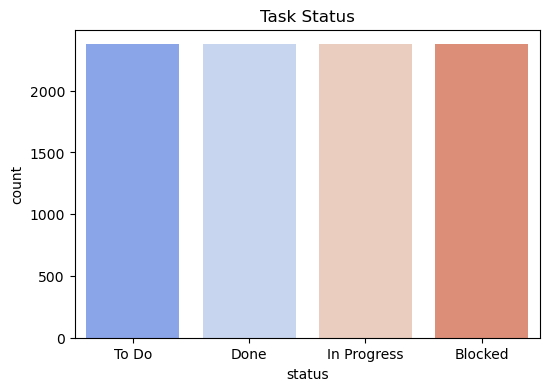

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'status', order = df['status'].value_counts().index, palette = 'coolwarm')
plt.title("Task Status")
plt.show()

### 3. Tasks per User (Top 10)

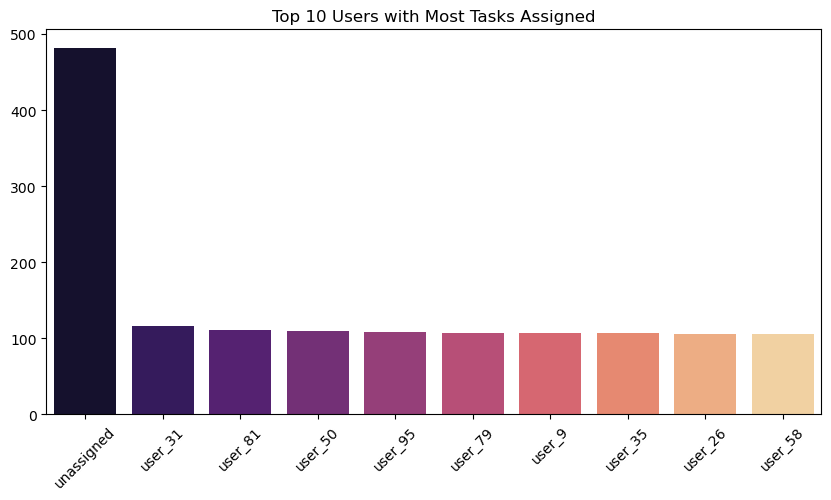

In [20]:
plt.figure(figsize = (10, 5))
top_users = df['assigned_to'].value_counts().head(10)
sns.barplot(x = top_users.index, y = top_users.values, palette = 'magma')
plt.xticks(rotation = 45)
plt.title("Top 10 Users with Most Tasks Assigned")
plt.show()

### 4. Word Cloud of Task Descriptions

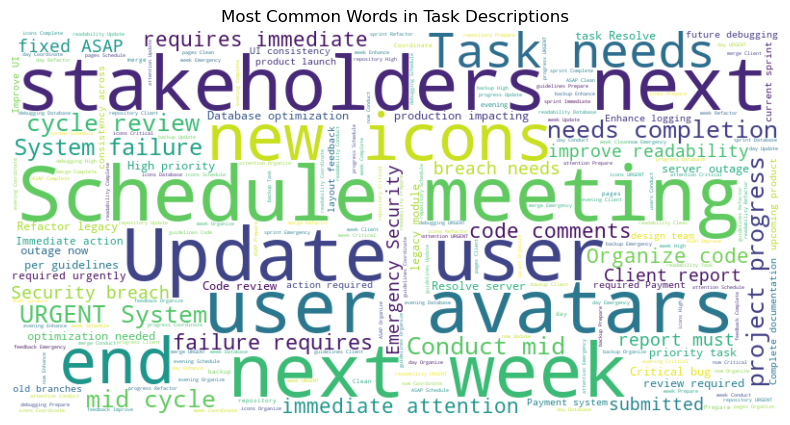

In [21]:
text = " ".join(df['task_description'].dropna().values)
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)
plt.figure(figsize = (10,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.title("Most Common Words in Task Descriptions")
plt.show()

### 5. Correlation Heatmap

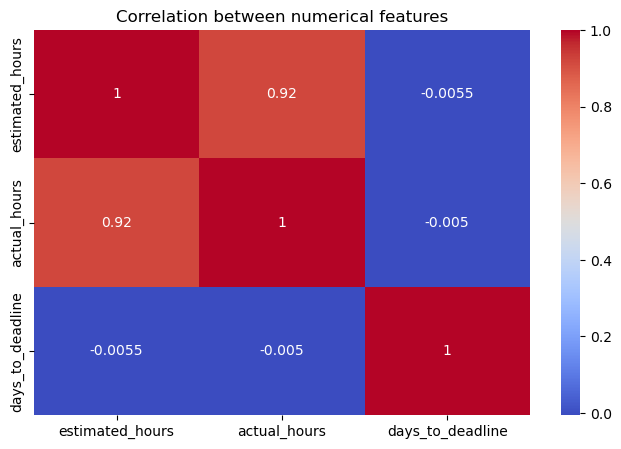

In [22]:
plt.figure(figsize = (8, 5))
sns.heatmap(df[['estimated_hours', 'actual_hours', 'days_to_deadline']].corr(), annot = True, cmap = "coolwarm")
plt.title('Correlation between numerical features')
plt.show()

## Univariate Analysis

### 6. Estimated Hours Distribution

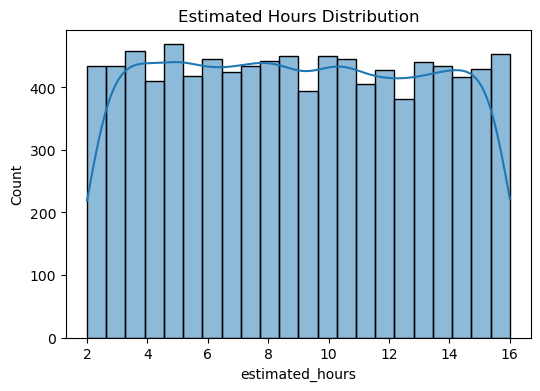

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df['estimated_hours'], kde=True)
plt.title("Estimated Hours Distribution")
plt.show()

### 7. Estimated Hours by Priority

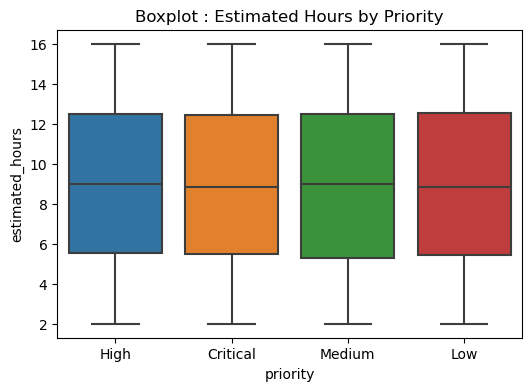

In [24]:
plt.figure(figsize = (6, 4))
sns.boxplot(x = 'priority', y = 'estimated_hours', data = df)
plt.title('Boxplot : Estimated Hours by Priority')
plt.show()

## Bivariate Analysis

### 8. Estimated vs Actual Hours by Priority

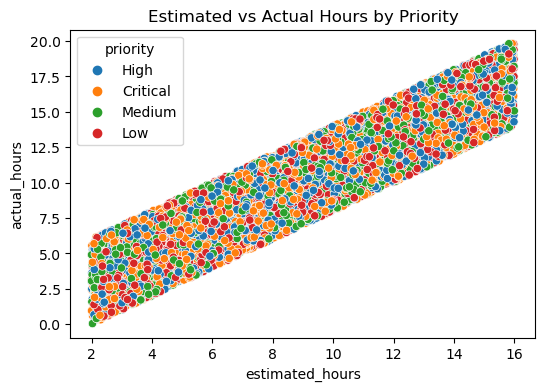

In [25]:
plt.figure(figsize = (6, 4))
sns.scatterplot(x = 'estimated_hours', y = 'actual_hours', hue = 'priority', data = df)
plt.title('Estimated vs Actual Hours by Priority')
plt.show()

### 9. Correlation Matrix

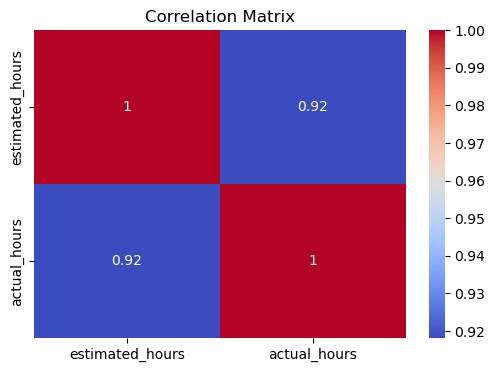

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['estimated_hours', 'actual_hours']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Multivariate Analysis

### 10. Pair Plot of Numerical Features

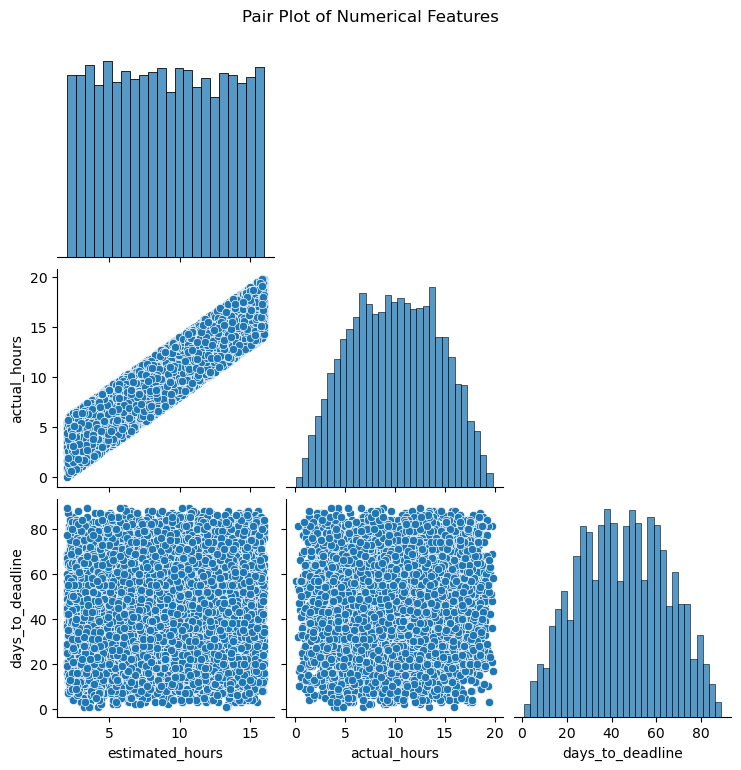

In [27]:
sns.pairplot(df[['estimated_hours', 'actual_hours', 'days_to_deadline']], corner=True)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

### 12. Extended Correlation Matrix

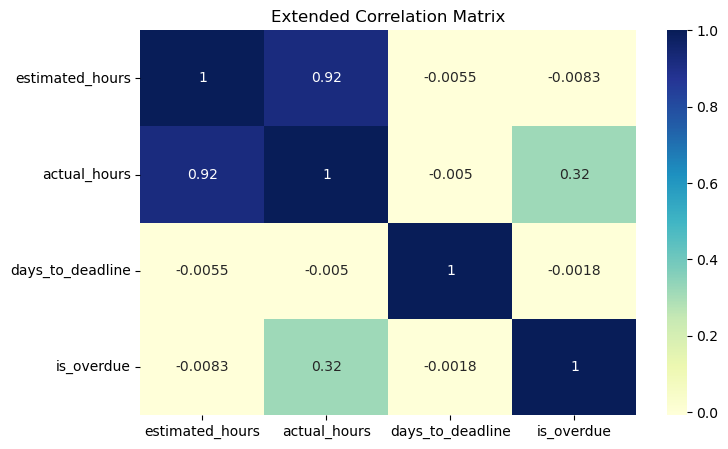

In [28]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['estimated_hours', 'actual_hours', 'days_to_deadline', 'is_overdue']].corr(), annot=True, cmap="YlGnBu")
plt.title("Extended Correlation Matrix")
plt.show()

## Bar plot of task counts per type

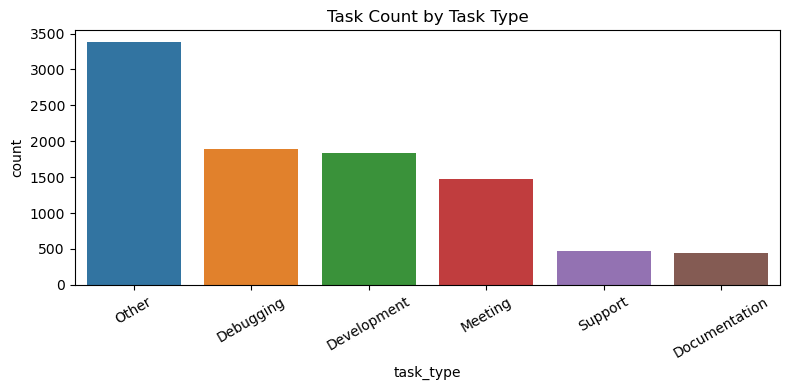

In [29]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='task_type', order=df['task_type'].value_counts().index)
plt.title("Task Count by Task Type")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Boxplot: estimated hours per task type

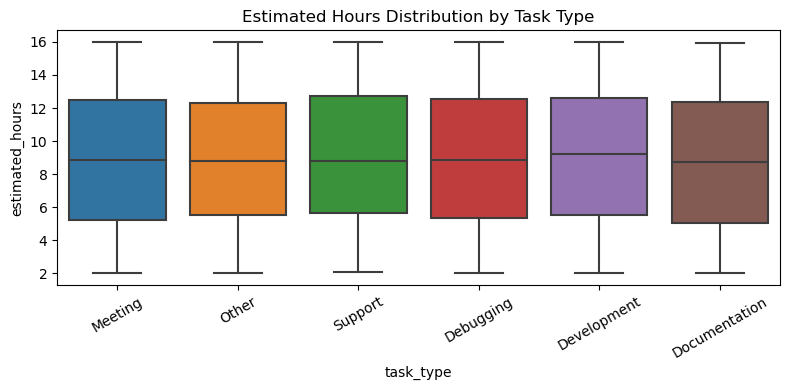

In [30]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='task_type', y='estimated_hours')
plt.title("Estimated Hours Distribution by Task Type")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Heatmap: average actual hours vs estimated hours per task_type

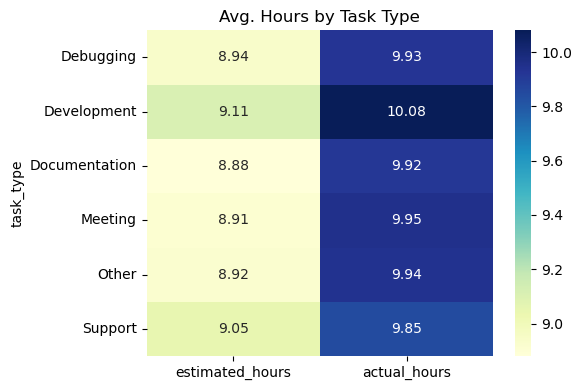

In [31]:
task_type_summary = df.groupby('task_type')[['estimated_hours', 'actual_hours']].mean().round(2)

plt.figure(figsize=(6, 4))
sns.heatmap(task_type_summary, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Avg. Hours by Task Type")
plt.tight_layout()
plt.show()

# NLP Processing

## Importing Libraries

In [32]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
df.head(10)

,Unnamed: 0,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,...,assigned_user_90,assigned_user_91,assigned_user_92,assigned_user_93,assigned_user_94,assigned_user_95,assigned_user_96,assigned_user_97,assigned_user_98,assigned_user_99
0,0,TASK_36085,Code review required urgently for merge.,High,2025-07-21,user_36,To Do,2025-05-23,15.58,17.97,...,0,0,0,0,0,0,0,0,0,0
1,1,TASK_47492,Task needs completion before end of the day.,High,2025-07-25,user_70,Done,2025-06-02,13.13,13.26,...,0,0,0,0,0,0,0,0,0,0
2,2,TASK_60680,High priority task: Resolve server outage now.,Critical,2025-06-21,unassigned,In Progress,2025-05-29,8.83,8.40,...,0,0,0,0,0,0,0,0,0,0
3,3,TASK_15554,Database optimization needed before backup.,High,2025-06-24,user_46,In Progress,2025-05-23,8.35,10.48,...,0,0,0,0,0,0,0,0,0,0
4,4,TASK_10877,Code review required urgently for merge.,High,2025-08-10,user_20,In Progress,2025-06-03,4.27,4.58,...,0,0,0,0,0,0,0,0,0,0
5,5,TASK_85745,Client report must be submitted by evening.,High,2025-08-12,user_79,To Do,2025-06-01,3.42,2.18,...,0,0,0,0,0,0,0,0,0,0
6,6,TASK_54122,Conduct mid-cycle review of project progress.,Medium,2025-07-15,user_83,Blocked,2025-06-16,3.03,6.31,...,0,0,0,0,0,0,0,0,0,0
7,7,TASK_99383,URGENT: System failure requires immediate atte...,Critical,2025-07-08,user_5,In Progress,2025-06-16,12.38,16.33,...,0,0,0,0,0,0,0,0,0,0
8,8,TASK_24199,Update user avatars with new icons.,Low,2025-06-20,user_94,Blocked,2025-06-06,2.88,1.50,...,0,0,0,0,1,0,0,0,0,0
9,9,TASK_34266,Enhance logging for future debugging.,Low,2025-06-19,user_90,Blocked,2025-06-08,12.19,13.83,...,1,0,0,0,0,0,0,0,0,0


## Initializing Tools

In [34]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [35]:
stemmer

<PorterStemmer>

## Preprocessing to task_description column

In [36]:
def preprocess_text(text):
    # 1. Normalize: Lowercase & remove punctuation
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    
    # 2. Tokenize
    tokens = nltk.word_tokenize(text)
    
    # 3. Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # 4. Apply Stemming
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    
    # Return Joined and cleaned Text
    return " ".join(stemmed_tokens)

df['cleaned_description'] = df['task_description'].astype(str).apply(preprocess_text)

In [37]:
df[['task_description', 'cleaned_description']].head(10)

,task_description,cleaned_description
0,Code review required urgently for merge.,code review requir urgent merg
1,Task needs completion before end of the day.,task need complet end day
2,High priority task: Resolve server outage now.,high prioriti task resolv server outag
3,Database optimization needed before backup.,databas optim need backup
4,Code review required urgently for merge.,code review requir urgent merg
5,Client report must be submitted by evening.,client report must submit even
6,Conduct mid-cycle review of project progress.,conduct midcycl review project progress
7,URGENT: System failure requires immediate atte...,urgent system failur requir immedi attent
8,Update user avatars with new icons.,updat user avatar new icon
9,Enhance logging for future debugging.,enhanc log futur debug


## Done with NLP preprocessing on Task Description

### Retrieving the Dataset

In [38]:
df.head(5)

,Unnamed: 0,task_id,task_description,priority,deadline,assigned_to,status,created_at,estimated_hours,actual_hours,...,assigned_user_91,assigned_user_92,assigned_user_93,assigned_user_94,assigned_user_95,assigned_user_96,assigned_user_97,assigned_user_98,assigned_user_99,cleaned_description
0,0,TASK_36085,Code review required urgently for merge.,High,2025-07-21,user_36,To Do,2025-05-23,15.58,17.97,...,0,0,0,0,0,0,0,0,0,code review requir urgent merg
1,1,TASK_47492,Task needs completion before end of the day.,High,2025-07-25,user_70,Done,2025-06-02,13.13,13.26,...,0,0,0,0,0,0,0,0,0,task need complet end day
2,2,TASK_60680,High priority task: Resolve server outage now.,Critical,2025-06-21,unassigned,In Progress,2025-05-29,8.83,8.40,...,0,0,0,0,0,0,0,0,0,high prioriti task resolv server outag
3,3,TASK_15554,Database optimization needed before backup.,High,2025-06-24,user_46,In Progress,2025-05-23,8.35,10.48,...,0,0,0,0,0,0,0,0,0,databas optim need backup
4,4,TASK_10877,Code review required urgently for merge.,High,2025-08-10,user_20,In Progress,2025-06-03,4.27,4.58,...,0,0,0,0,0,0,0,0,0,code review requir urgent merg


# Feature Extraction using TF-IDF

##### TF-IDF : TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used in NLP to reflect the importance of a word to a document in a collection or corpus. It's a technique that converts text into numerical vectors by multiplying term frequency (TF) with inverse document frequency (IDF).

##### How TF-IDF Works:
       Term Frequency (TF): Measures how often a term appears in a document. 
       Formula: TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d) 
       Inverse Document Frequency (IDF): Measures how important a term is across the entire corpus. 
       Formula: IDF(t) = log\_e (Total number of documents / Number of documents with term t in it) 
##### TF-IDF: The product of TF and IDF, indicating the term's importance within a specific document relative to the entire corpus. 
##### Formula: TF-IDF(t, d) = TF(t, d) * IDF(t)

### Importing Libraries

In [39]:
!pip install -q sentence-transformers

from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import nltk
import pandas as pd

## 1. TF-IDF Implementation

In [40]:
# Using Cleaned Text
descriptions = df['task_description'].fillna("")

# Initialize and TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features = 5000)
x_tfidf = tfidf.fit_transform(descriptions)

#convert to dataframe
tfidf_df = pd.DataFrame(x_tfidf.toarray(), columns = tfidf.get_feature_names_out())


tfidf_df.head()

,across,action,all,and,as,asap,attention,avatars,backup,be,...,ui,up,upcoming,update,urgent,urgently,user,users,week,with
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.473182,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.462462,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.473182,0.0,0.0,0.0,0.0


#### TF (Term Frequency): Counts how often a word appears.

#### IDF (Inverse Document Frequency): Penalizes common words.

#### TF-IDF highlights important but unique words.

## 2. Word2Vec Embedding

#### Each word is mapped to a vector using word context (semantic meaning).

In [41]:
# Tokenize descriptions for Word2Vec
tokenized_text = descriptions.apply(nltk.word_tokenize)


# Train Word2Vec model
w2v_model = Word2Vec(sentences = tokenized_text, vector_size = 100, window = 5, min_count = 2, workers = 4)


# Function to convert description to vector (mean of word vectors)
def get_vector(doc):
    if not doc:
        return np.zeroes(100)
    
    vectors = [w2v_model.wv[word] for word in doc if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)


# Apply on entire dataset
df['w2v_vector'] = tokenized_text.apply(get_vector)


# Example: view first vector
print("Vector shape:", df['w2v_vector'][0].shape)
print(df['w2v_vector'][0])

Vector shape: (100,)
[ 0.20242168  0.5185617   0.19492249 -0.24338637  0.2856837  -0.64406
 -0.01722323  0.78890264  0.07281418 -0.03120437 -0.35552815 -0.7584423
  0.3632429   0.5321241   0.05976173  0.48319453 -0.05775763  0.13722847
 -0.10974627 -1.2405145  -0.26961958  0.06913052 -0.2688133  -0.24867629
 -0.10851692  0.35012177  0.20182857 -0.2649893  -0.06030026  0.34578532
  0.62999165  0.14123979  0.2976201   0.0523754  -0.39046377  0.2962702
  0.3129699  -0.2552227   0.38310185 -0.32722807 -0.05927427 -0.16357674
 -0.16832778 -0.38366845  0.01440011 -0.09694524 -0.35649014  0.45667377
  0.29498142  0.10592095 -0.07512774 -0.26132995  0.14526089  0.5150603
  0.12239228  0.19920626 -0.39467636 -0.1653096  -0.25184277 -0.23474345
  0.32520583 -0.20189774  0.27967992  0.31154695 -0.19317113  0.24019827
  0.16256015 -0.32677546 -0.52443945  0.66796386  0.29306963  0.53990203
 -0.11824946 -0.5416801   0.1811185   0.45727047  0.07244815 -0.10739436
  0.1227202  -0.03669866  0.37821722

## 3. BERT Embedding (Transformer-Based Model)
#### BERT gives context-aware embeddings using pre-trained deep models.

In [42]:
from sentence_transformers import SentenceTransformer

# Load pre-trained BERT model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate BERT embeddings for each task description
bert_embeddings = bert_model.encode(descriptions.tolist(), show_progress_bar=True)

# Convert to DataFrame
bert_df = pd.DataFrame(bert_embeddings)
print("BERT Embedding shape:", bert_df.shape)
print(bert_df.head(10))

Batches:   0%|          | 0/297 [00:00<?, ?it/s]

BERT Embedding shape: (9500, 384)
        0         1         2         3         4         5         6    \
0 -0.067726 -0.004868 -0.100208 -0.018741 -0.035824 -0.009130 -0.023138   
1 -0.033292  0.024119  0.042640  0.026354  0.018689 -0.030705  0.060976   
2 -0.011416 -0.004654  0.052591 -0.008897  0.002316 -0.049274 -0.036166   
3 -0.011581  0.043164 -0.034452  0.022568 -0.037461 -0.027656 -0.021253   
4 -0.067726 -0.004868 -0.100208 -0.018741 -0.035824 -0.009130 -0.023138   
5 -0.016395  0.086105 -0.031315  0.015742 -0.001499  0.019011 -0.076764   
6 -0.016226  0.038393 -0.000087 -0.012017  0.043874  0.004121 -0.099643   
7 -0.018296  0.009944  0.018834 -0.012350  0.054675 -0.026158 -0.014553   
8 -0.031352 -0.009456  0.041841 -0.040238  0.018990 -0.057327  0.043696   
9 -0.013093  0.016219 -0.009433  0.019707  0.081263 -0.145714 -0.006367   

        7         8         9    ...       374       375       376       377  \
0  0.037763 -0.066698 -0.006618  ... -0.027396  0.042702 -0.

# Task Classification

## Target variable : task_type

### Importing Libraries

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import re

### Features X and Y

In [44]:
X = x_tfidf
y = df['task_type']


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train (features for training): {X_train.shape}")
print(f"Shape of X_test (features for testing): {X_test.shape}")
print(f"Shape of y_train (labels for training): {y_train.shape}")
print(f"Shape of y_test (labels for testing): {y_test.shape}")

# Model Training
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

# Model Evaluation
# Make predictions on the test set
y_pred = mnb_model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Multinomial Naive Bayes: {accuracy*100:.2f}")

# Print the classification report, which includes precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Shape of X_train (features for training): (7600, 109)
Shape of X_test (features for testing): (1900, 109)
Shape of y_train (labels for training): (7600,)
Shape of y_test (labels for testing): (1900,)

Accuracy of Multinomial Naive Bayes: 100.00

Classification Report:
               precision    recall  f1-score   support

    Debugging       1.00      1.00      1.00       379
  Development       1.00      1.00      1.00       366
Documentation       1.00      1.00      1.00        90
      Meeting       1.00      1.00      1.00       296
        Other       1.00      1.00      1.00       675
      Support       1.00      1.00      1.00        94

     accuracy                           1.00      1900
    macro avg       1.00      1.00      1.00      1900
 weighted avg       1.00      1.00      1.00      1900



### Precision, Recall of Naive Bayes

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 1. Precision
precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)
print(f"Precision (macro): {precision_macro * 100:.2f}")
print(f"Precision (weighted): {precision_weighted * 100:.2f}")


# 2. Recall
recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)
print(f"Recall (macro): {recall_macro * 100:.2f}")
print(f"Recall (weighted): {recall_weighted * 100:.2f}")

Precision (macro): 100.00
Precision (weighted): 100.00
Recall (macro): 100.00
Recall (weighted): 100.00


### SVM

In [46]:
from sklearn.svm import LinearSVC

X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 4. Model Training (Multinomial Naive Bayes) ---
# Initialize and train the Multinomial Naive Bayes model
svm_model = LinearSVC(max_iter=2000, random_state=42) # Set random_state for reproducibility
svm_model.fit(X_svm_train, y_svm_train)

# --- 5. Model Evaluation ---
# Make predictions on the test set
y_pred_svm = svm_model.predict(X_svm_test)

# Calculate and print the accuracy
accuracy_svm = accuracy_score(y_svm_test, y_pred_svm)
print(f"\nAccuracy of Linear SVM: {accuracy_svm * 100:.2f}")

# Print the classification report, which includes precision, recall, and F1-score for each class
print("\nClassification Report (Linear SVM):")
print(classification_report(y_svm_test, y_pred_svm))


Accuracy of Linear SVM: 100.00

Classification Report (Linear SVM):
               precision    recall  f1-score   support

    Debugging       1.00      1.00      1.00       379
  Development       1.00      1.00      1.00       366
Documentation       1.00      1.00      1.00        90
      Meeting       1.00      1.00      1.00       296
        Other       1.00      1.00      1.00       675
      Support       1.00      1.00      1.00        94

     accuracy                           1.00      1900
    macro avg       1.00      1.00      1.00      1900
 weighted avg       1.00      1.00      1.00      1900



### Precision, Recall of SVM

In [47]:
# 1. Precision
precision_macro = precision_score(y_svm_test, y_pred_svm, average='macro', zero_division=0)
precision_weighted = precision_score(y_svm_test, y_pred_svm, average='weighted', zero_division=0)
print(f"Precision (macro): {precision_macro * 100:.2f}")
print(f"Precision (weighted): {precision_weighted * 100:.2f}")


# 2. Recall
recall_macro = recall_score(y_svm_test, y_pred_svm, average='macro', zero_division=0)
recall_weighted = recall_score(y_svm_test, y_pred_svm, average='weighted', zero_division=0)
print(f"Recall (macro): {recall_macro * 100:.2f}")
print(f"Recall (weighted): {recall_weighted * 100:.2f}")

Precision (macro): 100.00
Precision (weighted): 100.00
Recall (macro): 100.00
Recall (weighted): 100.00


## Overall Results till now

| Metrics  | Naive Bayes | SVM    | Target Variable |
| -------- | ----------- | ------ | --------------- |
| Accuracy | 100.0%      | 100.0% | Task_type       |
| Precision| 100.0%      | 100.0% | Task_type       |
| Recall   | 100.0%      | 100.0% | Task_type       |

# Visualizations

## 1. Confusion Matrix

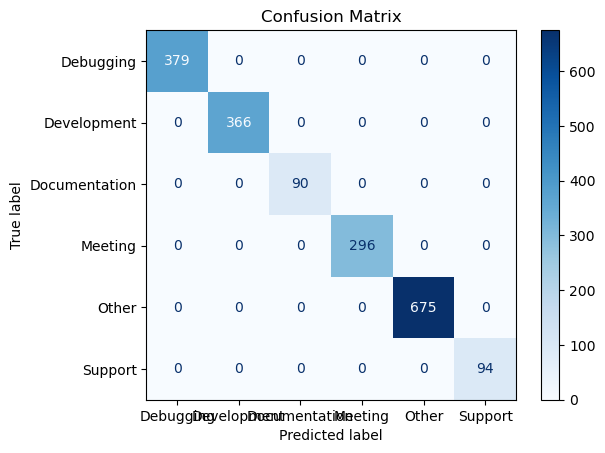

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Encode task_type
task_type_encoder = LabelEncoder()
df['task_type_encoded'] = task_type_encoder.fit_transform(df['task_type'])

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=task_type_encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

## 2. Classification Report Heatmap

### Visualize precision, recall, and f1-score for each class.

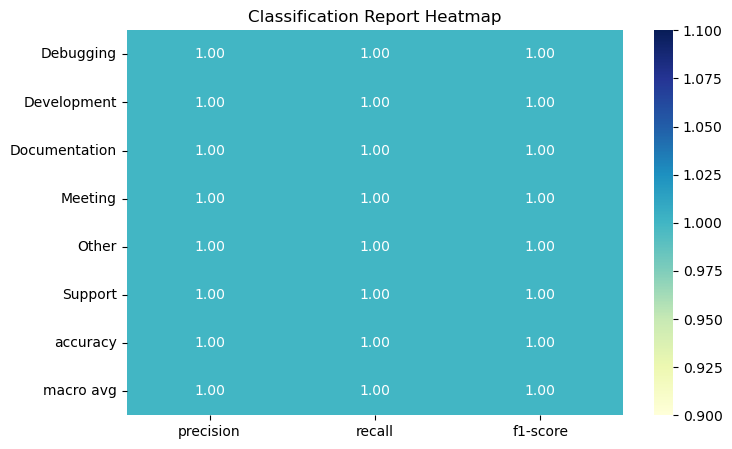

In [49]:
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd

report = classification_report(y_test, y_pred, target_names=task_type_encoder.classes_, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

## 3. WordCloud of Task Descriptions (Per Class)

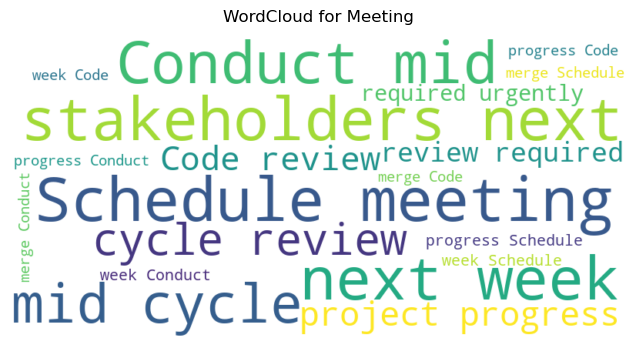

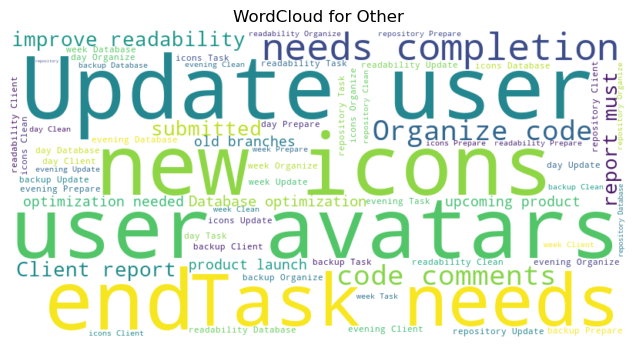

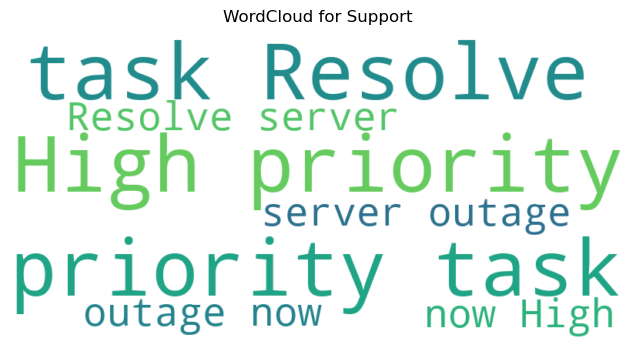

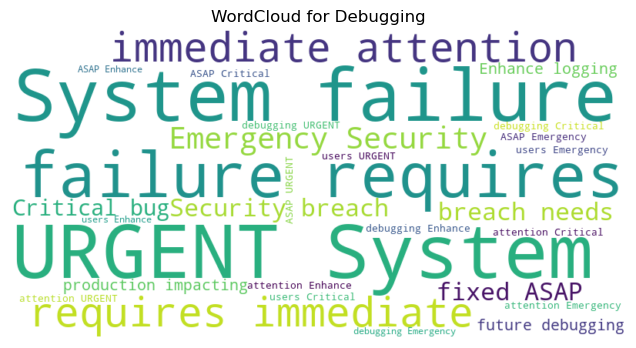

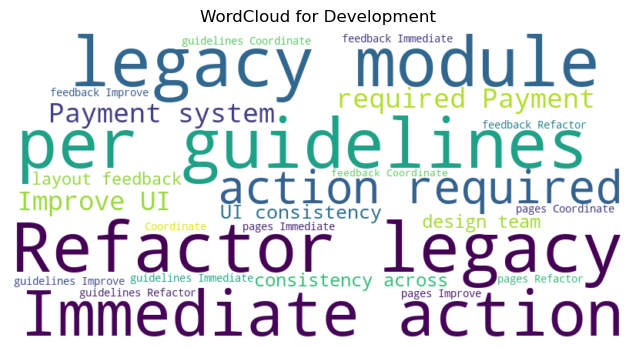

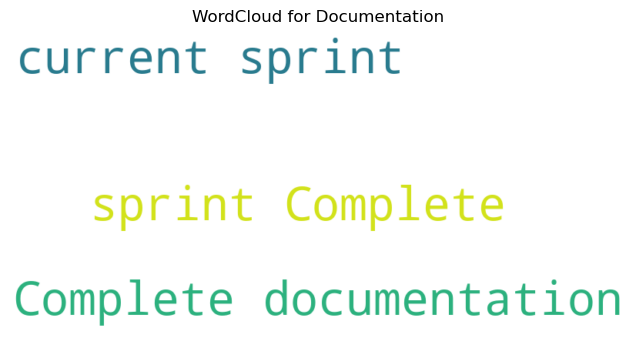

In [50]:
from wordcloud import WordCloud

for label in df['task_type'].unique():
    text = " ".join(df[df['task_type'] == label]['task_description'].dropna())
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {label}")
    plt.show()

## 4. Most used Top Words

In [51]:
import numpy as np

def show_top_words(classifier, vectorizer, class_labels, n=10):
    feature_names = np.array(vectorizer.get_feature_names_out())
    for i, class_label in enumerate(class_labels):
        top = np.argsort(classifier.feature_log_prob_[i])[-n:]
        print(f"\nClass: {class_label}")
        print("Top features:", feature_names[top])

show_top_words(mnb_model, tfidf, task_type_encoder.classes_)


Class: Debugging
Top features: ['immediate' 'system' 'future' 'debugging' 'logging' 'enhance' 'attention'
 'urgent' 'requires' 'failure']

Class: Development
Top features: ['module' 'per' 'guidelines' 'ui' 'pages' 'consistency' 'across' 'down'
 'payment' 'action']

Class: Documentation
Top features: ['emergency' 'down' 'design' 'debugging' 'feedback' 'for' 'sprint'
 'complete' 'documentation' 'current']

Class: Meeting
Top features: ['mid' 'cycle' 'conduct' 'schedule' 'next' 'stakeholders' 'meeting'
 'merge' 'urgently' 'review']

Class: Other
Top features: ['avatars' 'readability' 'comments' 'and' 'organize' 'backup' 'needed'
 'database' 'optimization' 'before']

Class: Support
Top features: ['day' 'enhance' 'with' 'task' 'server' 'now' 'outage' 'resolve' 'high'
 'priority']
